# Featuring

In [1]:
# warningの無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Yu Mincho'

In [3]:
# 標準ライブラリ
import pickle
import datetime
from dateutil.relativedelta import relativedelta

# basic
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# User defined functions
from self_lib import tips
from self_lib import doggie_tail as d_

# Jupyter上で図を表示するためのコマンド
%matplotlib inline

In [4]:
# 表示列数を指定
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### version setting

In [5]:
mode="pre"  #"pre / test"

In [6]:
if mode=="pre":
    filepath="../data/feature/pre_"
elif mode=="test":
    filepath="../data/feature/test_"
else:
    print("miss spelling")

### Input

In [7]:
# data定義
with open('../_regulation/data_def.pickle','rb') as f:
    d_def = pickle.load(f)

In [8]:
# data読込み
if mode=="pre":
    # data
    raw_data=pd.read_pickle("../data/pre/pre_data.pickle")
elif mode=="test":
    # test_data
    raw_data=pd.read_pickle("../data/pre/pre_test_data.pickle")
else:
    print("miss spelling")

In [9]:
data = raw_data.copy()

In [10]:
data.shape

(194669, 29)

In [11]:
# データ列の定義を表示する
d_def

ID                                                               融資番号
Borrower                                債務法人の名前（特定を避けるため関連のない文字列に変換済）
City                                                     債務法人の所在地（都市）
State                                                     債務法人の所在地（州）
Zip                                                    債務法人の所在地（郵便番号）
Bank                                      融資銀行名（特定を避けるため関連のない文字列に変換済）
BankState                                                 融資銀行の所在地（州）
SystemCode                                                産業分類システムコード
ApprovalDate                                               支援機関による承認日
ApprovalFY                                                支援機関による承認年度
Term                                                          融資期間（月）
Employees                                                  債務法人による雇用数
ExistNew                                          1 = 既存の事業, 2 = 新規事業
CreateJob                                                    創出された職種数
RetainedJob         

In [12]:
d_.d(data)

,Borrower,City,State,Zip,Bank,BankState,SystemCode,ApprovalDate,ApprovalFY,Term,Employees,ExistNew,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowLoan,DisbursementDate,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D
count,194669,194659,194667,194669,194353,194352,194669,194669,194669.0,194669.00,194669.00,194648.00,194669.00,194669.00,194669.00,194669.00,193703,194076,194669,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00
missing,0,10,2,0,316,317,0,0,0.0,0.00,0.00,21.00,0.00,0.00,0.00,0.00,966,593,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
missing_per,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
unique,194669,17691,51,22454,4308,53,1247,8379,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,7,4934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,hsqnjpronqdkmjf,LOS ANGELES,CA,10001,kcjyktbecc,CA,0,1993-07-07 00:00:00,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,1995-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2593,28932,236,20202,25745,42889,264,11433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91836,168999,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.53,11.04,1.27,8.49,10.97,1694.11,0.76,NaN,NaN,NaN,199438.40,0.20,190616.95,148117.77,2000.96,6.49,16.17,2001.25,6.36,27.58
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.60,66.48,0.45,238.71,240.67,10122.01,0.64,NaN,NaN,NaN,288160.55,84.18,283312.21,228961.99,5.98,3.37,8.76,5.90,3.43,7.45
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,4000.00,0.00,1000.00,500.00,1971.00,1.00,1.00,1971.00,1.00,1.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.00,2.00,1.00,0.00,0.00,1.00,0.00,NaN,NaN,NaN,40000.00,0.00,35000.00,20000.00,1996.00,4.00,9.00,1997.00,4.00,30.00


In [13]:
data.head()

,Borrower,City,State,Zip,Bank,BankState,SystemCode,ApprovalDate,ApprovalFY,Term,Employees,ExistNew,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowLoan,DisbursementDate,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6646334007,aaadtnlmrxysprm,MARIETTA,OH,45750,jhcuxowaay,IL,453220,2003-09-02,2003,72,3,1.00,0,3,1,1,0,N,2003-10-31,51000,0,51000,25500,2003,9,2,2003,10,31
3878874000,aaahkwwkrdqgejh,DEPERE,WI,54115,emmeuifhxi,WI,321920,2000-08-08,2000,300,29,1.00,0,0,1,1,N,N,2000-08-31,450000,0,450000,337500,2000,8,8,2000,8,31
4914354000,aaaiglofapigzle,ELLSWORTH,WI,54011,wgjchmahlw,WI,445110,2001-09-18,2001,240,25,1.00,6,25,1,2,N,N,2002-06-12,835000,0,835000,835000,2001,9,18,2002,6,12
5118304000,aaapfpphifjluoa,COEUR D'ALENE,ID,83814,ymhcrxdvqu,CA,561612,2001-12-20,2002,60,150,1.00,0,150,1,1,Y,N,2002-02-28,90983,0,50000,25000,2001,12,20,2002,2,28
8822654008,aaapozqjdlpgbub,CORAL SPRINGS,FL,33071,dgcclpzbmw,NY,451120,2005-04-28,2005,111,10,1.00,0,7,1,1,0,N,2005-06-30,458000,0,458000,343500,2005,4,28,2005,6,30


In [14]:
# 目的変数yを取得する
if mode=='pre':
    data_y=data['LoanStatus']
    data_y.to_pickle(filepath + 'feature_data_y.pickle')
elif mode=='test':
    pass

In [15]:
data['RevLineCr'].value_counts(dropna=False)

N      91836
0      53329
Y      45009
T       3520
NaN      966
`          4
1          2
R          1
A          1
-          1
Name: RevLineCr, dtype: int64

In [16]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['RevLineCr'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['RevLineCr'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('RevLineCr')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [17]:
# カウントが少ない値を欠損値に置換
data['RevLineCr'][data['RevLineCr'].isna()]=0
data['RevLineCr'][~data['RevLineCr'].isin(['Y','N'])]=0
data['RevLineCr'][data['RevLineCr'].isin(['N'])]=1
data['RevLineCr'][data['RevLineCr'].isin(['Y'])]=2
data['RevLineCr']=data['RevLineCr'].astype('int32')

In [18]:
data['RevLineCr'].value_counts(dropna=False)

1    91836
0    57824
2    45009
Name: RevLineCr, dtype: int64

In [19]:
data['LowLoan'].value_counts(dropna=False)

N      168999
Y       24387
NaN       593
0         317
C         154
S         120
A          87
R          12
Name: LowLoan, dtype: int64

In [20]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['LowLoan'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['LowLoan'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('LowLoan')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [21]:
# カウントが少ない値を欠損値に置換
data['LowLoan'][data['LowLoan'].isna()]=0
data['LowLoan'][~data['LowLoan'].isin(['N','Y'])]=0
data['LowLoan'][data['LowLoan'].isin(['N'])]=1
data['LowLoan'][data['LowLoan'].isin(['Y'])]=2
data['LowLoan']=data['LowLoan'].astype('int32')

In [22]:
data['LowLoan'].value_counts(dropna=False)

1    168999
2     24387
0      1283
Name: LowLoan, dtype: int64

In [23]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['LowLoan'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['LowLoan'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('LowLoan')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [24]:
data['FranchiseCode'].value_counts(dropna=False)

1        139938
0         47806
78760       425
68020       172
21780       145
          ...  
35625         1
69145         1
15935         1
48815         1
38765         1
Name: FranchiseCode, Length: 1499, dtype: int64

In [25]:
# フランチャイズかどうかのカテゴリーに変換
data['FranchiseCode'][data['FranchiseCode'].isin([1,0])]=0
data['FranchiseCode'][~data['FranchiseCode'].isin([0])]=1

In [26]:
data['FranchiseCode'].value_counts(dropna=False)

0    187744
1      6925
Name: FranchiseCode, dtype: int64

In [27]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['FranchiseCode'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['FranchiseCode'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('FranchiseCode')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [28]:
data['CreateJob'].value_counts(dropna=False)

0      136195
1       14203
2       12613
3        6150
4        4441
        ...  
91          1
92          1
163         1
93          1
182         1
Name: CreateJob, Length: 158, dtype: int64

In [29]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['CreateJob'].value_counts(),bins=50)

# ax1 = plt.subplot(111)   
# ax1.hist(data['CreateJob'].loc[data['LoanStatus']==1].value_counts(),bins=50)

# # plt.axvline(x=3000, ymin=0, ymax=1,color="r")

# ax1.set_xlabel('CreateJob')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [30]:
# CreateJobかどうかのカテゴリーに変換
data['CreateJob'][data['CreateJob']>0]=1
data['CreateJob'][~data['CreateJob']>0]=0

In [31]:
# data['CreateJob_4000']=0
# data['CreateJob_4000'][data['CreateJob']<4000]=1
# data['CreateJob_4000'][data['CreateJob']>=4000]=0

In [32]:
# data['CreateJob']=data.drop('CreateJob',axis=1)

In [33]:
data['RetainedJob'].value_counts(dropna=False)

0       94421
1       19902
2       16778
3       11093
4        8649
        ...  
304         1
176         1
1711        1
430         1
255         1
Name: RetainedJob, Length: 243, dtype: int64

In [34]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['RetainedJob'].value_counts(),bins=30)

# ax1 = plt.subplot(111)   
# ax1.hist(data['RetainedJob'].loc[data['LoanStatus']==1].value_counts(),bins=30)

# ax1.set_xlabel('RetainedJob')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [35]:
# RetainedJobかどうかのカテゴリーに変換
data['RetainedJob'][data['RetainedJob']>0]=1
data['RetainedJob'][~data['RetainedJob']>0]=0

In [36]:
data['RetainedJob'].value_counts(dropna=False)

1    100248
0     94421
Name: RetainedJob, dtype: int64

In [37]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1a_data=data['RetainedJob'].copy()
# ax1a_data=ax1a_data.fillna('NaN')
# ax1a_data=ax1a_data.value_counts()

# ax1b_data=data['RetainedJob'].loc[data['LoanStatus']==1].copy()
# ax1b_data=ax1b_data.fillna('NaN')
# ax1b_data=ax1b_data.value_counts()

# ax1 = plt.subplot(111)   
# ax1 = ax1a_data.plot.bar(rot=0,color='b')

# ax2 = plt.subplot(111)   
# ax2 = ax1b_data.plot.bar(rot=0,color='r')

# ax1.set_xlabel('RetainedJob')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend('All','Default')

# # 表示
# plt.show()

In [38]:
data['ExistNew'].value_counts(dropna=False)

1.00    140716
2.00     53705
0.00       227
NaN         21
Name: ExistNew, dtype: int64

In [39]:
# ExistNewかどうかのカテゴリーに変換
data['ExistNew_c']=data['ExistNew'].copy()
data['ExistNew_c'][data['ExistNew'].isna()]=0
data['ExistNew_c']=data['ExistNew_c'].astype(int)

In [40]:
data['ExistNew_c'].value_counts(dropna=False)

1    140716
2     53705
0       248
Name: ExistNew_c, dtype: int64

In [41]:
data['Employees'].head()

ID
6646334007      3
3878874000     29
4914354000     25
5118304000    150
8822654008     10
Name: Employees, dtype: int64

In [42]:
data['Employees'].isna().sum()

0

In [43]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['Employees'].loc[data['Employees']<100],bins=100)

# ax1 = plt.subplot(111)   
# ax1.hist(data['Employees'].loc[data['Employees']<100].loc[data['LoanStatus']==1],bins=100)

# ax1.set_xlabel('Employees')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [44]:
data['Term'].head()

ID
6646334007     72
3878874000    300
4914354000    240
5118304000     60
8822654008    111
Name: Term, dtype: int64

In [45]:
data['Term'].isna().sum()

0

In [46]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'],bins=100)

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'].loc[data['LoanStatus']==1],bins=100)

# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [47]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'].loc[data['Term']<100],bins=100)

# ax1 = plt.subplot(111)   
# ax1.hist(data['Term'].loc[data['Term']<100].loc[data['LoanStatus']==1],bins=50)

# plt.axvline(x=12, ymin=0, ymax=1,color="r")
# plt.axvline(x=36, ymin=0, ymax=1,color="r")
# plt.axvline(x=36, ymin=0, ymax=1,color="r")
# plt.axvline(x=48, ymin=0, ymax=1,color="r")
# plt.axvline(x=60, ymin=0, ymax=1,color="r")
# plt.axvline(x=72, ymin=0, ymax=1,color="r")
# plt.axvline(x=84, ymin=0, ymax=1,color="r")

# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [48]:
data['Term_U84']=data['Term'].apply(lambda x: 1 if x<=84 else 0)

In [49]:
# 期間が12/6/3か月で割り切れる、キリのいい月数かフラグをたてる
def flg(month,cnt):
    if month<=100:
        if month % cnt ==0:
            return 1
        else:
            return 0
    else:
        return 0
data["Term_12"]= data['Term'].apply(lambda x: flg(x,12))
data["Term_6"]= data['Term'].apply(lambda x: flg(x,6))
data["Term_3"]= data['Term'].apply(lambda x: flg(x,3))

In [50]:
a_data=data.copy()
from dateutil.relativedelta import relativedelta

# 貸金期日
def addMonth(month):
    return relativedelta(years=month//12,months=month%12)
addMonth(85)

relativedelta(years=+7, months=+1)

In [51]:
# a_data[['ApprovalDate','Approval_M']].apply(lambda x: x['ApprovalDate'] + relativedelta(month=+x['Approval_M']),axis=1)
data['EndDate']=data[['ApprovalDate','Term']].apply(lambda x: x['ApprovalDate'] + addMonth(x['Term']),axis=1)

In [52]:
data=data.drop('EndDate',axis=1)

In [53]:
# data.columns

In [54]:
# print(data['ApprovalDate'])
# print(data['Approval_M'])

In [55]:
# d_.d(a_data)

In [56]:
# data['SystemCode'].head()

In [57]:
# システムコードの出現回数のカウント　-> 特定のシステムコードは出現しやすいが、それ以外はほとんど出現しない
df_sysCnt=pd.DataFrame(data['SystemCode'].value_counts(ascending=False)).T
df_sysCnt

,0,722110,722211,621210,811111,624410,812112,621310,561730,541110,445310,812320,621111,447110,811121,484110,713940,453220,451110,453998,721110,238990,541330,445110,541940,811192,722410,236118,238220,524210,235110,541511,541512,531210,238210,236115,812990,445120,541611,453110,812310,484121,448310,444130,561720,235310,448120,722213,441120,442110,...,922110,486210,813211,111334,925120,926110,519120,322110,522110,311213,111199,721120,325131,522210,486910,333241,311222,443141,325132,332214,926130,311351,212113,311221,311312,212112,332114,327120,315993,443142,112130,327110,333516,421520,315210,483112,315221,335222,221112,926140,111160,332216,311930,333995,332993,813212,522190,111992,311230,522294
SystemCode,42889,5945,3334,3253,3157,2210,2007,1988,1936,1739,1507,1458,1450,1400,1387,1325,1320,1302,1254,1248,1216,1204,1173,1167,1147,1082,1032,1024,1003,968,963,936,927,916,880,878,875,836,807,807,799,785,780,739,731,722,717,714,692,662,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(df_sysCnt.value_counts(),bins=10)

# ax1.set_xlabel('df_sysCnt')
# ax1.set_ylabel('counts')

# # # 凡例の表示
# # plt.legend()

# # 表示
# plt.show()

In [59]:
data['SystemCode'].isna().sum()

0

In [60]:
data['SystemCode']=data['SystemCode'].astype(int)

In [61]:
# 産業分類コードがあるかないかのフラグ
data['SystemCode'].loc[data['SystemCode']>0]=1
data['SystemCode'].loc[data['SystemCode']==0]=0

In [62]:
# data['SystemCode'].value_counts()

In [63]:
# data['SystemCode']=data['SystemCode'].astype(str)

In [64]:
# data['Sys_A'],data['Sys_B'],data['Sys_C'],data['Sys_D'],data['Sys_E'],data['Sys_F']=data['SystemCode'].str[0],data['SystemCode'].str[1],data['SystemCode'].str[2],data['SystemCode'].str[3],data['SystemCode'].str[4],data['SystemCode'].str[5]

In [65]:
# Borrower/Bankは削除する
data=data.drop(['Borrower','Bank'],axis=1)

In [66]:
# 住所コードを５桁に補完する
def addZip0(Zip):
    if len(Zip)<=5:
        cnt0=5-len(Zip)
        return "0"*cnt0 + Zip
    else:
        pass

data['Zip']=data['Zip'].apply(lambda x : addZip0(x)).astype(str)
data['zip_A'],data['zip_B'],data['zip_C'],data['zip_D'],data['zip_E']=data['Zip'].str[0],data['Zip'].str[1],data['Zip'].str[2],data['Zip'].str[3],data['Zip'].str[4]

In [67]:
# data['Zip'].nunique()

In [68]:
# CityはZipと同一内容のため削除する
data=data.drop(['City'],axis=1)

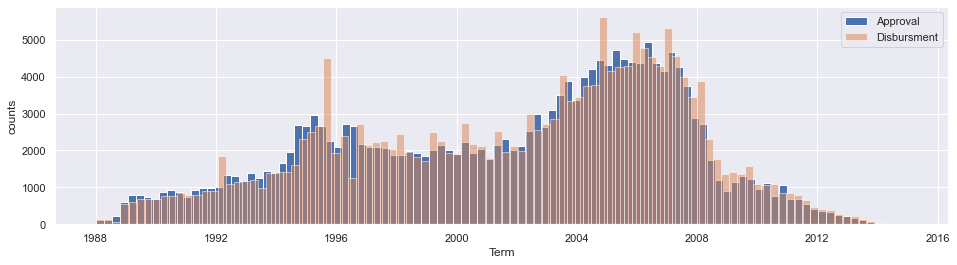

In [69]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(111)   
ax1.hist(data['ApprovalDate'][data['ApprovalDate']<"2020-01-01"]["1988-01-01"<data['ApprovalDate']],bins=100)

ax2 = plt.subplot(111)   
ax2.hist(data['DisbursementDate'][data['DisbursementDate']<"2020-01-01"]["1988-01-01"<data['DisbursementDate']],bins=100,alpha=0.5)

ax1.set_xlabel('Term')
ax1.set_ylabel('counts')

# 凡例の表示
plt.legend(["Approval","Disbursment"])

# 表示
plt.show()

In [70]:
# 返済間隔
data['Dis_App_Month']=data['DisbursementDate'].dt.month-data['ApprovalDate'].dt.month
data['Dis_App_Month'][data['Dis_App_Month']<0]=0.0
data['Dis_App_Month']=data['Dis_App_Month'].astype('int32')

In [71]:
data['Dis_App_Month']

ID
6646334007    1
3878874000    0
4914354000    0
5118304000    0
8822654008    2
             ..
1159325000    4
3130896009    5
8978083003    2
4100653001    2
1188476005    0
Name: Dis_App_Month, Length: 194669, dtype: int32

In [72]:
# 返済回数
data['ReturnCnt']=0
data['ReturnCnt']=data['Term']//data['Dis_App_Month']
data['ReturnCnt'][data['Dis_App_Month']==0]=0
data['ReturnCnt'][data['Dis_App_Month']==np.inf]=0
data['ReturnCnt'][data['Dis_App_Month']==-np.inf]=0
data['ReturnCnt']=data['ReturnCnt'].astype(int)

In [73]:
# 実際の貸金総額
data['ActualGross']=data['DisbursementGross']+data['BalanceGross']

In [74]:
# 1月当たりの返済金額
data['ReturnAmountPerMonth']=0
data['ReturnAmountPerMonth']=data['LoanAmount']//data['Term']
data['ReturnAmountPerMonth'][data['Term']==0]=0
data['ReturnAmountPerMonth'][data['ReturnAmountPerMonth']==np.inf]=data['ReturnAmountPerMonth'].mean()
data['ReturnAmountPerMonth']=data['ReturnAmountPerMonth'].astype(int)
data['ReturnAmountPerMonth']

ID
6646334007     708
3878874000    1500
4914354000    3479
5118304000     833
8822654008    4126
              ... 
1159325000    1190
3130896009    1825
8978083003    1200
4100653001     826
1188476005      59
Name: ReturnAmountPerMonth, Length: 194669, dtype: int32

In [75]:
# 1回あたりの返済金額
data['ReturnAmountPerCnt']=0
data['ReturnAmountPerCnt']=data['LoanAmount']//data['ReturnCnt']
data['ReturnAmountPerCnt'][data['ReturnCnt']==0]=0
data['ReturnAmountPerCnt'][data['ReturnAmountPerCnt']==np.inf]=data['ActualGross']
data['ReturnAmountPerCnt'][data['ReturnAmountPerCnt']==-np.inf]=data['ActualGross']
data['ReturnAmountPerCnt']=data['ReturnAmountPerCnt'].astype(int)

In [76]:
# 実際の貸金金額と第三者保証の比率
data['GuaranteedAmountRatio']=data['GuaranteedLoan']//data['ActualGross']

In [77]:
# 実際の貸金金額と金融機関承認額の比率
data['ProperAmountRatio']=(data['LoanAmount']//data['ActualGross'])

In [78]:
# 金融機関承認額と第三者保証の差額
data['dif_Bank-Grt']=data['LoanAmount']-data['GuaranteedLoan']

In [79]:
# a_rate
data['a_rate']=np.round((data['DisbursementGross']-data['ReturnAmountPerMonth']*data['Dis_App_Month'])/data['LoanAmount']*100,decimals=2)

In [80]:
# b_rate
data['b_rate']=np.round(data['dif_Bank-Grt']/data['LoanAmount'],decimals=2)

In [81]:
# c_amount
data['c_amount']=data['ReturnAmountPerCnt']*data['a_rate']

In [82]:
# data['a_rate']

In [83]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['a_rate'].loc[data['a_rate']<10.5].loc[8<data['a_rate']],bins=80)

# ax2 = plt.subplot(111)   
# ax2.hist(data['a_rate'].loc[data['LoanStatus']==1].loc[data['a_rate']<10.5].loc[8<data['a_rate']],bins=80,alpha=0.5)

# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend(["Approval","Disbursment"])

# # 表示
# plt.show()

In [84]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# ax1.hist(data['LoanAmount'].loc[data['LoanAmount']<1000000],bins=100)

# ax2 = plt.subplot(111)   
# ax2.hist(data['ActualGross'].loc[data['ActualGross']<1000000],bins=100,alpha=0.5)

# ax3 = plt.subplot(111)   
# ax3.hist(data['GuaranteedLoan'].loc[data['GuaranteedLoan']<1000000],bins=100,alpha=0.5)

# ax1.set_xlabel('LoanAmount')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend(["金融機関承認額","支払+未払い金額","第三者保証"])

# # 表示
# plt.show()

In [85]:
data.shape

(194669, 47)

In [86]:
# 不要な行を削除
data=data.drop(['ApprovalDate','DisbursementDate','ApprovalFY'],axis=1)

In [87]:
data.shape

(194669, 44)

In [88]:
# カテゴリ変数リスト
l_cat=['zip_A','zip_B','zip_C','zip_D','zip_E','SystemCode','RevLineCr','LowLoan','ExistNew','CreateJob','RetainedJob','FranchiseCode','UrbanRural']

In [89]:
# 不要な列を削除
data=data.drop(['State','Zip','BankState'],axis=1)

In [90]:
data.shape

(194669, 41)

In [91]:
# カテゴリー変数化
data[l_cat]=data[l_cat].astype('category')

In [92]:
d_.d(data)

,SystemCode,Term,Employees,ExistNew,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowLoan,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ExistNew_c,Term_U84,Term_12,Term_6,Term_3,zip_A,zip_B,zip_C,zip_D,zip_E,Dis_App_Month,ReturnCnt,ActualGross,ReturnAmountPerMonth,ReturnAmountPerCnt,GuaranteedAmountRatio,ProperAmountRatio,dif_Bank-Grt,a_rate,b_rate,c_amount
count,194669.0,194669.00,194669.00,194648.0,194669.0,194669.0,194669.0,194669.0,194669.0,194669.0,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669,194669,194669,194669,194669,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00
missing,0.0,0.00,0.00,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
missing_per,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
unique,2.0,NaN,NaN,3.0,2.0,2.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,10,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1.0,NaN,NaN,1.0,0.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,151780.0,NaN,NaN,140716.0,136195.0,100248.0,187744.0,102380.0,91836.0,168999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37760,26722,41311,46993,29073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,111.53,11.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199438.40,0.20,190616.95,148117.77,2000.96,6.49,16.17,2001.25,6.36,27.58,1.27,0.62,0.44,0.47,0.51,NaN,NaN,NaN,NaN,NaN,1.26,38.24,199438.60,2439.19,3048.61,0.10,0.83,42499.18,117.08,0.29,282721.83
std,NaN,79.60,66.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,288160.55,84.18,283312.21,228961.99,5.98,3.37,8.76,5.90,3.43,7.45,0.45,0.48,0.50,0.50,0.50,NaN,NaN,NaN,NaN,NaN,1.70,57.21,288160.55,11235.94,17864.04,0.45,0.57,78411.06,62.21,0.18,1198459.28
min,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.00,0.00,1000.00,500.00,1971.00,1.00,1.00,1971.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,4000.00,0.00,0.00,0.00,0.00,0.00,-501.74,0.00,-50832990.00
25%,NaN,60.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.00,0.00,35000.00,20000.00,1996.00,4.00,9.00,1997.00,4.00,30.00,1.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40000.00,476.00,0.00,0.00,1.00,7140.00,98.02,0.15,0.00


In [93]:
data.shape

(194669, 41)

In [94]:
# ダミー変数化
df_dummy=pd.get_dummies(data[l_cat], dummy_na=True,prefix=l_cat,prefix_sep='_',drop_first=True)

In [95]:
# ダミー化済列削除
data=data.drop(l_cat,axis=1)

In [96]:
data.shape

(194669, 28)

In [97]:
# データの連結
data=pd.merge(data, df_dummy, right_index=True, left_index=True)

In [98]:
# df_dummy.shape

In [99]:
data.shape

(194669, 98)

In [100]:
d_.d(data)

,Term,Employees,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ExistNew_c,Term_U84,Term_12,Term_6,Term_3,Dis_App_Month,ReturnCnt,ActualGross,ReturnAmountPerMonth,ReturnAmountPerCnt,GuaranteedAmountRatio,ProperAmountRatio,dif_Bank-Grt,a_rate,b_rate,c_amount,zip_A_1,zip_A_2,zip_A_3,zip_A_4,zip_A_5,zip_A_6,zip_A_7,zip_A_8,zip_A_9,zip_A_nan,zip_B_1,zip_B_2,zip_B_3,zip_B_4,zip_B_5,zip_B_6,zip_B_7,zip_B_8,zip_B_9,zip_B_nan,zip_C_1,zip_C_2,zip_C_3,zip_C_4,zip_C_5,zip_C_6,zip_C_7,zip_C_8,zip_C_9,zip_C_nan,zip_D_1,zip_D_2,zip_D_3,zip_D_4,zip_D_5,zip_D_6,zip_D_7,zip_D_8,zip_D_9,zip_D_nan,zip_E_1,zip_E_2,zip_E_3,zip_E_4,zip_E_5,zip_E_6,zip_E_7,zip_E_8,zip_E_9,zip_E_nan,SystemCode_1.0,SystemCode_nan,RevLineCr_1.0,RevLineCr_2.0,RevLineCr_nan,LowLoan_1.0,LowLoan_2.0,LowLoan_nan,ExistNew_1.0,ExistNew_2.0,ExistNew_nan,CreateJob_1.0,CreateJob_nan,RetainedJob_1.0,RetainedJob_nan,FranchiseCode_1.0,FranchiseCode_nan,UrbanRural_1.0,UrbanRural_2.0,UrbanRural_nan
count,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.0,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.0,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.0,194669.00,194669.0,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.0,194669.00,194669.00,194669.0,194669.00,194669.00,194669.00,194669.00,194669.00,194669.00,194669.0,194669.00,194669.00,194669.0,194669.00,194669.0,194669.0,194669.00,194669.00,194669.00,194669.0,194669.00,194669.0,194669.00,194669.00,194669.0,194669.00,194669.00,194669.0,194669.00,194669.00,194669.00,194669.00,194669.0,194669.00,194669.0,194669.00,194669.0,194669.00,194669.00,194669.0
missing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0
missing_per,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [101]:
data.head()

,Term,Employees,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ExistNew_c,Term_U84,Term_12,Term_6,Term_3,Dis_App_Month,ReturnCnt,ActualGross,ReturnAmountPerMonth,ReturnAmountPerCnt,GuaranteedAmountRatio,ProperAmountRatio,dif_Bank-Grt,a_rate,b_rate,c_amount,zip_A_1,zip_A_2,zip_A_3,zip_A_4,zip_A_5,zip_A_6,zip_A_7,zip_A_8,zip_A_9,zip_A_nan,zip_B_1,zip_B_2,zip_B_3,zip_B_4,zip_B_5,zip_B_6,zip_B_7,zip_B_8,zip_B_9,zip_B_nan,zip_C_1,zip_C_2,zip_C_3,zip_C_4,zip_C_5,zip_C_6,zip_C_7,zip_C_8,zip_C_9,zip_C_nan,zip_D_1,zip_D_2,zip_D_3,zip_D_4,zip_D_5,zip_D_6,zip_D_7,zip_D_8,zip_D_9,zip_D_nan,zip_E_1,zip_E_2,zip_E_3,zip_E_4,zip_E_5,zip_E_6,zip_E_7,zip_E_8,zip_E_9,zip_E_nan,SystemCode_1.0,SystemCode_nan,RevLineCr_1.0,RevLineCr_2.0,RevLineCr_nan,LowLoan_1.0,LowLoan_2.0,LowLoan_nan,ExistNew_1.0,ExistNew_2.0,ExistNew_nan,CreateJob_1.0,CreateJob_nan,RetainedJob_1.0,RetainedJob_nan,FranchiseCode_1.0,FranchiseCode_nan,UrbanRural_1.0,UrbanRural_2.0,UrbanRural_nan
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6646334007,72,3,51000,0,51000,25500,2003,9,2,2003,10,31,1,1,1,1,1,1,72,51000,708,708,0,1,25500,98.61,0.50,69815.88,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3878874000,300,29,450000,0,450000,337500,2000,8,8,2000,8,31,1,0,0,0,0,0,0,450000,1500,0,0,1,112500,100.00,0.25,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4914354000,240,25,835000,0,835000,835000,2001,9,18,2002,6,12,1,0,0,0,0,0,0,835000,3479,0,1,1,0,100.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
5118304000,60,150,90983,0,50000,25000,2001,12,20,2002,2,28,1,1,1,1,1,0,0,90983,833,0,0,0,25000,181.97,0.50,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
8822654008,111,10,458000,0,458000,343500,2005,4,28,2005,6,30,1,0,0,0,0,2,55,458000,4126,8327,0,1,114500,98.20,0.25,817711.40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [102]:
# raw_data.shape

In [103]:
data.to_pickle(filepath+"feature_data.pickle")
if mode=='pre':
    data=data.drop(['LoanStatus'],axis=1)
data.to_pickle(filepath+"feature_data_X.pickle")

In [104]:
data.shape

(194669, 98)